# Ocular Disease Recognition

This notebook is focus on exploring and cleaning the data.

## 1. Understanding the Problem

The problem is to identify what kind of ocular disease a person has based on only its eye photos.

## 2. Data Understanding

### 2.1. Data collection

The data comes from different hospitals in China, which is divided into two forms:

* **Eye photographs**: left and right eye.
* **Structure CSV file**: patient information.

Illnesses:

* Normal (N).
* Diabetes (D).
* Glaucoma (G).
* Cataract (C).
* Age related Macular Degeneration (A).
* Hypertension (H).
* Pathological Myopia (M).
* Other diseases/abnormalities (O).

Link: <https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k/data>

### 2.2. Analytical approach

* **Collection method**: it is not specified, but for the purpose of this project it can be used a sampling method.
* **Probability sampling**: random sampling method.
* **Is it representative?**: yes, because it is assumed to be used a sampling method.

## 3. Data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import ast
from PIL import Image

### 3.1. Review the state of the data

This is a first glance over the data.

In [2]:
PATH_DATA = "/kaggle/input/ocular-disease-recognition-odir5k"

In [3]:
df_full = pd.read_csv(os.path.join(PATH_DATA, "full_df.csv"))
print("Shape:", df_full.shape)
df_full.head()

Shape: (6392, 19)


,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

In [5]:
print("Total missing by columns:")
df_full.isnull().sum()

Total missing by columns:


ID                           0
Patient Age                  0
Patient Sex                  0
Left-Fundus                  0
Right-Fundus                 0
Left-Diagnostic Keywords     0
Right-Diagnostic Keywords    0
N                            0
D                            0
G                            0
C                            0
A                            0
H                            0
M                            0
O                            0
filepath                     0
labels                       0
target                       0
filename                     0
dtype: int64

#### 3.1.1. Categorical

In [6]:
categorical_features = ["Patient Sex", "Left-Diagnostic Keywords", "Right-Diagnostic Keywords"]

In [7]:
for c in categorical_features:
    print("\nFeature:", c)
    print(df_full[c].unique())


Feature: Patient Sex
['Female' 'Male']

Feature: Left-Diagnostic Keywords
['cataract' 'normal fundus'
 'laser spot，moderate non proliferative retinopathy'
 'macular epiretinal membrane' 'moderate non proliferative retinopathy'
 'drusen' 'epiretinal membrane'
 'moderate non proliferative retinopathy，hypertensive retinopathy'
 'pathological myopia' 'mild nonproliferative retinopathy'
 'hypertensive retinopathy'
 'macular epiretinal membrane，mild nonproliferative retinopathy'
 'macular hole' 'wet age-related macular degeneration'
 'moderate non proliferative retinopathy，laser spot'
 'moderate non proliferative retinopathy，myelinated nerve fibers'
 'dry age-related macular degeneration'
 'epiretinal membrane，myelinated nerve fibers' 'diabetic retinopathy'
 'epiretinal membrane，lens dust' 'atrophy'
 'laser spot，white vessel，moderate non proliferative retinopathy'
 'chorioretinal atrophy' 'moderate non proliferative retinopathy，cataract'
 'retinitis pigmentosa'
 'moderate non proliferative 

#### 3.1.2. Numeric

In [8]:
numeric_features = ["Patient Age"]

In [9]:
df_full[numeric_features].describe()

,Patient Age
count,6392.000000
mean,57.857947
std,11.727737
min,1.000000
25%,51.000000
50%,59.000000
75%,66.000000
max,91.000000


#### 3.1.3. Target variable

In [10]:
target_variable = "labels"
df_full[target_variable].unique()

array(["['N']", "['D']", "['O']", "['M']", "['H']", "['C']", "['A']",
       "['G']"], dtype=object)

#### 3.1.4. Image

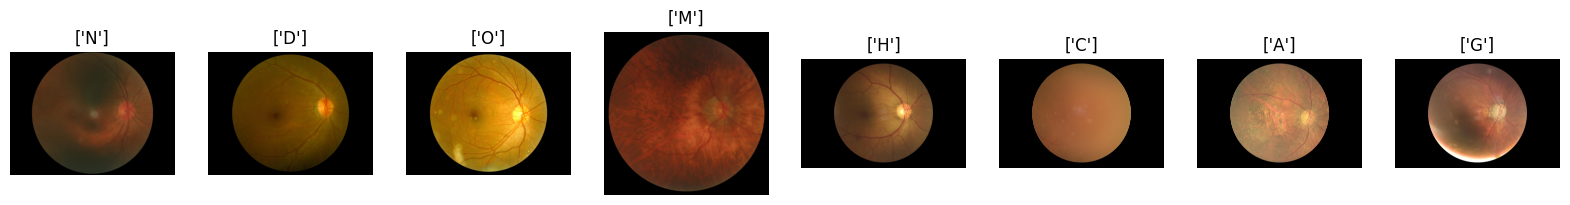

In [11]:
num_classes = len(df_full[target_variable].unique())
fig, axes = plt.subplots(1, num_classes, figsize=(20, 10))

for i, d in enumerate(df_full[target_variable].unique()):
    image_name = df_full[df_full["labels"] == d]["filename"].iloc[0]
    image_path = os.path.join(PATH_DATA, "ODIR-5K", "ODIR-5K", "Training Images", image_name)
    image = np.asarray(Image.open(image_path))
    axes[i].imshow(image)
    axes[i].set_title(d)
    axes[i].axis("off")
    
plt.show()

#### 3.1.5. Conclusion

* There are 6392 photographs.
* This is multiclass problem.
* At the first glance, no all features from CSV file are necessary. The useful features to train a model are:
  * **labels**: target variable which says what kind of illness is.
  * **filename**: to identify the image file.
* There are no missing values.
* The target variable has noise in its values.

### 3.2. Data cleaning

Based on initial conclusions, it is necessary to apply data cleaning.

Revome noise in target variable.

In [12]:
# Convert list-form value into list and get the first value
df_full["labels"] = df_full["labels"].map(lambda x: ast.literal_eval(x)[0])

In [13]:
df_full.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,N,"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,N,"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,D,"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,D,"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,D,"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


### 3.4. Exploratory Data Analysis (EDA)

Explore the data distribucion.

#### 3.4.1. Categorical

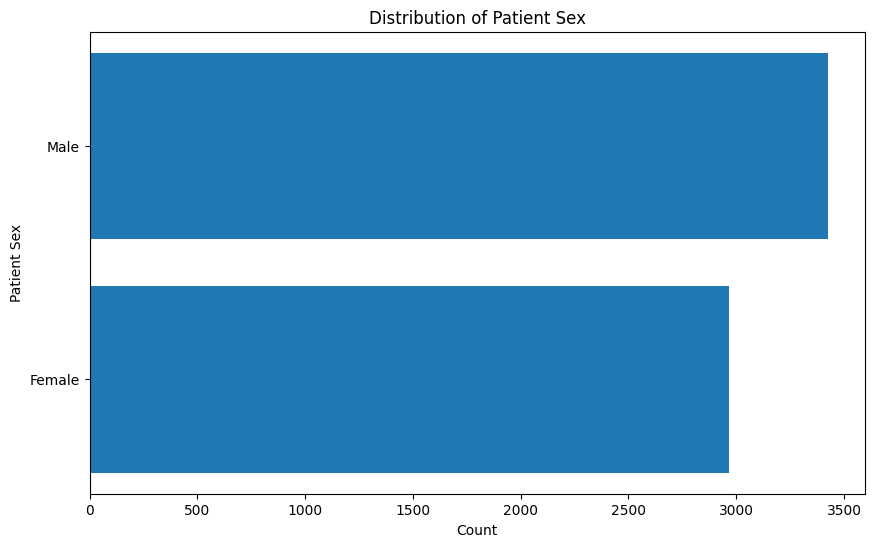

In [14]:
sex_count = df_full["Patient Sex"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(sex_count.index, sex_count.values)
plt.xlabel("Count")
plt.ylabel("Patient Sex")
plt.title("Distribution of Patient Sex")
plt.gca().invert_yaxis()
plt.show()

#### 3.4.2. Numeric

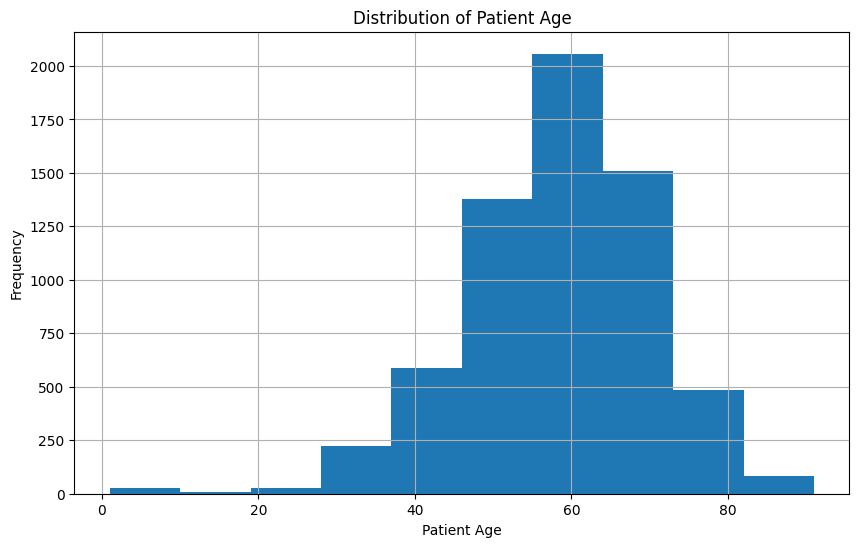

In [15]:
plt.figure(figsize = (10, 6))
df_full["Patient Age"].hist()
plt.xlabel("Patient Age")
plt.ylabel("Frequency")
plt.title("Distribution of Patient Age")
plt.show()

#### 3.4.3. Target variable

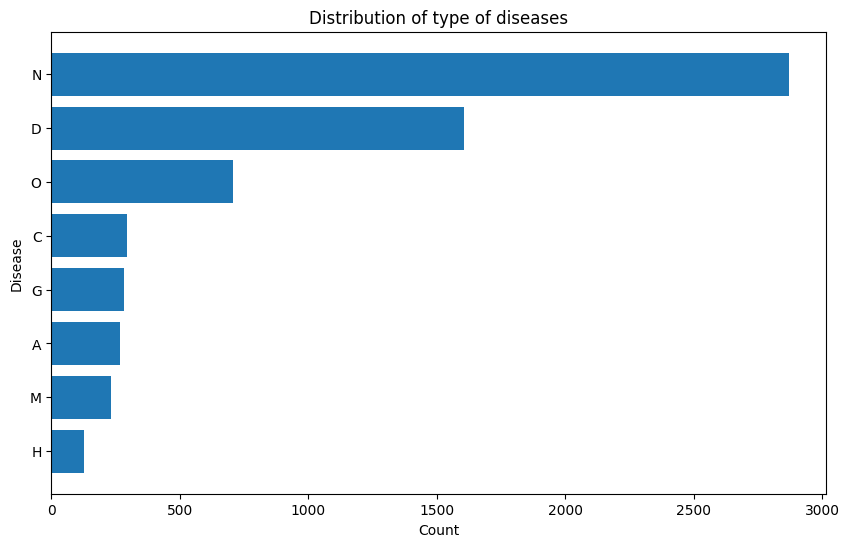

In [16]:
labels_count = df_full["labels"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(labels_count.index, labels_count.values)
plt.xlabel("Count")
plt.ylabel("Disease")
plt.title("Distribution of type of diseases")
plt.gca().invert_yaxis()
plt.show()

#### 3.4.4. Conclusion

* For categorical features, no all features were taken into account because most of them are only noise. Only "Patient Sex" is relevant to get extra information about the data, where more cases belong to men.
* For numeric features, the "Patient Age" is nearly normal.
* For target variable, classes are not equally distributed, so there is a imbalance class problem.